In [120]:
import torch
import pandas as pd
import plotnine as pn
import sys
# sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")

In [121]:
curve_data = pd.read_csv("/Users/nathanielimel/uci/projects/ibsg/multirun/states=100/signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/curve_points.csv")

# maps gamma to H(U|M) bits
gamma_dict = {
    3: 0.0,
    0: 1.532,
    -1: 3.163,
    -2: 4.726,
    # -3: 6.078,
}
sim_data = {
    key: pd.read_csv(f"noise={key}.csv") for key in gamma_dict
}

In [122]:
# fill aesthetics
for key, val in gamma_dict.items():
    sim_data[key]["noise"] = val

sim_data = pd.concat(list(sim_data.values()))

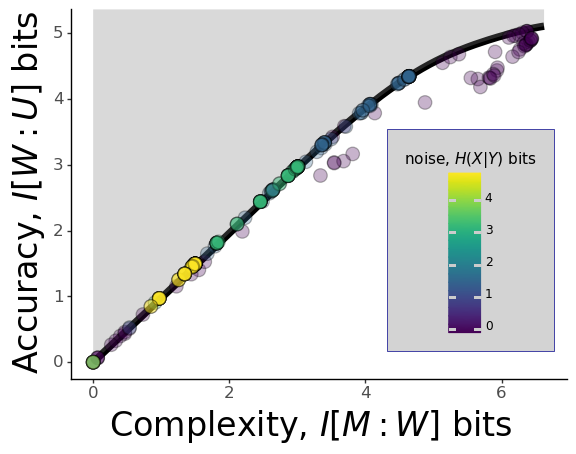

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: main_figure


In [123]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=torch.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_jitter( # emergent langs
        data=sim_data,
        mapping=pn.aes(
            # fill="discr_need",
            fill="noise",
            # shape="language",
            ),
        alpha=0.3,
        size=5,
    )
    + pn.labs(fill="noise, $H(X|Y)$ bits")
    + pn.scale_fill_continuous(
    #     # breaks=[0., 0.5, 1.],
    #     breaks=[0., 1.,],
    #     # labels=["low", "mid", "high"],
    #     labels=["low", "high"],
    )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    # force axes to origin. Note this blocks the perfectly simple point!
    # + pn.scale_x_continuous(expand = (0, 0)) 
    # + pn.scale_y_continuous(expand = (0, 0))

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.75, 0.4),
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "top", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 1.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)
plot.save("main_figure", width=10, height=10, dpi=300,)